In [ ]:
from selenium.webdriver.common.print_page_options import PrintOptions
from selenium.webdriver.support.relative_locator import with_tag_name
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver import Chrome
from selenium import webdriver

In [ ]:
driverpath = 'chromedriver'
driver = Chrome(driverpath)

或用 *with* 关键字：
```python
with Chrome() as driver:
    pass
```

# 浏览器导航

## 发起请求

In [ ]:
driver.get('http://www.baidu.com')

## 获取当前 *URL*

In [ ]:
driver.current_url

## 后退

In [ ]:
driver.get('https://movie.douban.com')
driver.back()

## 前进

In [ ]:
driver.forward()

## 刷新

In [ ]:
driver.refresh()

## 获取标题

In [ ]:
driver.title

## 关闭窗口

In [ ]:
driver.close()

## 在会话结束时退出浏览器

In [ ]:
driver.quit()

如果不在测试上下文中运行 *WebDriver*，您可以考虑使用 *try / finally* 关键字，这是大多数语言都提供的，这样一个异常处理仍然可以清理 *WebDriver* 会话。

```python
try:
  # WebDriver 代码 …
finally:
  driver.quit()
```

*Python* 的 *WebDriver* 现在支持 *Python* 上下文管理器，当使用 *with* 关键字时，可以在执行结束时自动退出驱动程序。

```python
with webdriver.Chrome() as driver:
  # WebDriver 代码 …

  # 在此缩进位置后 WebDriver 会自动退出
```

# 定位元素

使用 *WebDriver* 时要学习的最基本的技术之一是如何查找页面上的元素。 *WebDriver* 提供了许多内置的选择器类型，其中包括根据 *id* 属性查找元素:

In [ ]:
# from selenium.webdriver.common.by import By
driver.get('http://www.baidu.com')
div = driver.find_element(By.ID, "lg")

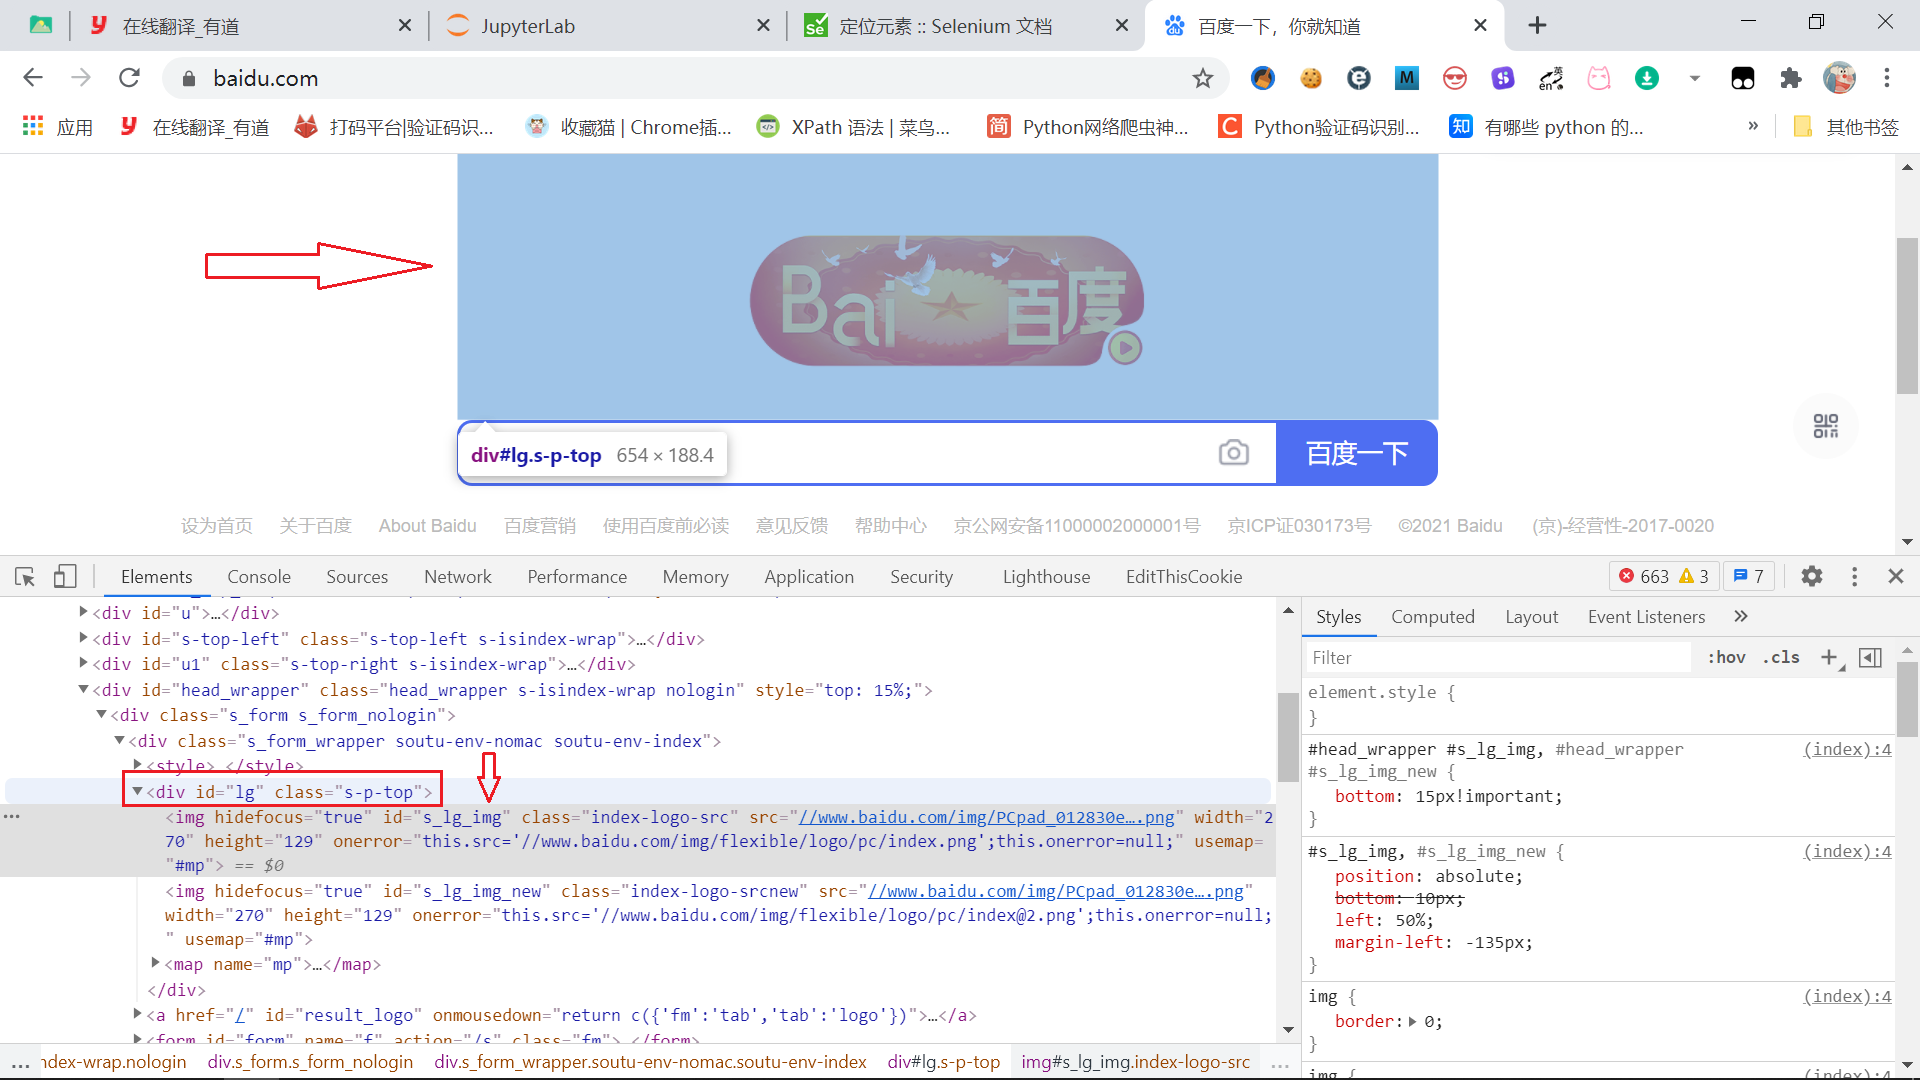

如示例所示，在 *WebDriver* 中定位元素是在 *WebDriver* 实例对象上完成的。 <code style="color: #ca7900">find_Element(<i>By</i>)</code> 方法返回另一个基本对象类型  *WebElement*。

一旦你已经找到一个元素的引用，你可以通过对该对象实例使用相同的调用来缩小搜索范围：

In [ ]:
img = div.find_element(By.ID, "s_lg_img")

如果有多个元素，则可以使用<code style="color: #ca7900">find_elements(By)</code>。

## 元素选择策略

在 *WebDriver* 中有8种不同的内置元素定位策略：

<table>
    <thead>
        <tr>
            <th>定位器 Locator</th>
            <th>描述</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>class name</td>
            <td>定位class属性与搜索值匹配的元素（不允许使用复合类名）</td>
        </tr>
        <tr>
            <td>css selector</td>
            <td>定位 CSS 选择器匹配的元素</td>
        </tr>
        <tr>
            <td>id</td>
            <td>定位 id 属性与搜索值匹配的元素</td>
        </tr>
        <tr>
            <td>name</td>
            <td>定位 name 属性与搜索值匹配的元素</td>
        </tr>
        <tr>
            <td>link text</td>
            <td>定位link text可视文本与搜索值完全匹配的锚元素</td>
        </tr>
        <tr>
            <td>partial link text</td>
            <td>定位link text可视文本部分与搜索值部分匹配的锚点元素。如果匹配多个元素，则只选择第一个元素。</td>
        </tr>
        <tr>
            <td>tag name</td>
            <td>定位标签名称与搜索值匹配的元素</td>
        </tr>
        <tr>
            <td>xpath</td>
            <td>定位与 XPath 表达式匹配的元素</td>
        </tr>
    </tbody>
</table>

## 使用选择器的提示

一般来说，如果 *HTML* 的 *id* 是可用的、唯一的且是可预测的，那么它就是在页面上定位元素的首选方法。它们的工作速度非常快，可以避免复杂的 *DOM* 遍历带来的大量处理。

如果没有唯一的 *id*，那么最好使用写得好的 *CSS* 选择器来查找元素。*XPath* 和 *CSS* 选择器一样好用，但是它语法很复杂，并且经常很难调试。尽管 *XPath* 选择器非常灵活，但是他们通常未经过浏览器厂商的性能测试，并且运行速度很慢。

基于链接文本和部分链接文本的选择策略有其缺点，即只能对链接元素起作用。此外，它们在 *WebDriver* 内部调用 *XPath* 选择器。

标签名可能是一种危险的定位元素的方法。页面上经常出现同一标签的多个元素。这在调用 <code style="color: #ca7900">find_Elements(<i>By</i>)</code> 方法返回元素集合的时候非常有用。

建议您尽可能保持定位器的紧凑性和可读性。使用 *WebDriver* 遍历 *DOM* 结构是一项性能花销很大的操作，搜索范围越小越好。

## *Find Element From Element*

此方法用于在父元素的上下文中查找子元素。为此，父 *WebElement* 与<code style="color: #ca7900">find_Element</code>链接并访问子元素.

In [ ]:
driver.get("http://www.google.com")

search_form = driver.find_element(By.TAG_NAME, "form")
search_box = search_form.find_element(By.NAME, "q")
search_box.send_keys("webdriver")

*Find Elements From Element* 方法用于在父元素的上下文中查找匹配子 *WebElement* 的列表。为此，父 *WebElement* 与<code style="color: #ca7900">find_Element</code>链接并访问子元素。这里就不做演示了。

## *Get Active Element*

此方法用于追溯或查找当前页面上下文中具有焦点的 *DOM* 元素。

In [ ]:
driver.get("https://www.google.com")
driver.find_element(By.CSS_SELECTOR, '[name="q"]').send_keys("webElement")

# Get attribute of current active element
attr = driver.switch_to.active_element.get_attribute("title")
print(attr)

## *Is Element Enabled*

此方法用于检查网页上连接的元素是否被启用或禁用。返回一个布尔值，如果在当前浏览上下文中启用了连接的元素，则返回 *True*；否则返回 *False*。

In [ ]:
driver.get("http://www.google.com")
   
# Returns true if element is enabled else returns false
value = driver.find_element(By.NAME, 'btnK').is_enabled()

## *Is Element Selected*

此方法确定是否已选择引用的元素。此方法广泛用于复选框，单选按钮，输入元素和选项元素。

返回一个布尔值，如果在当前浏览上下文中已选择引用的元素，则返回 *True*，否则返回 *False*。

In [ ]:
driver.get("https://the-internet.herokuapp.com/checkboxes")

# Returns true if element is checked else returns false
value = driver.find_element(By.CSS_SELECTOR, "input[type='checkbox']:first-of-type").is_selected()

## *Get Element TagName*

此方法用于获取在当前浏览上下文中具有焦点的被引用元素的 *TagName*。

In [ ]:
driver.get("https://www.example.com")

# Returns TagName of the element
attr = driver.find_element(By.CSS_SELECTOR, "h1").tag_name

## *Get Element Rect*

用于获取参考元素的尺寸和坐标。

提取的数据主体包含以下详细信息：

- 元素左上角的 *X* 轴位置
- 元素左上角的 *Y* 轴位置
- 元素的高度
- 元素宽度

In [ ]:
driver.get("https://www.example.com")
    
# Returns height, width, x and y coordinates referenced element
res = driver.find_element(By.CSS_SELECTOR, "h1").rect

## 获取元素 *CSS* 值

获取当前浏览上下文中元素的特定计算样式属性的值。

In [ ]:
driver.get('https://www.example.com')

# Retrieves the computed style property 'color' of linktext
cssValue = driver.findElement(By.LINK_TEXT, "More information...").value_of_css_property('color')

## 获取元素文本

In [ ]:
driver.get("https://www.example.com")

# Retrieves the text of the element
text = driver.find_element(By.CSS_SELECTOR, "h1").text

## 获取页面源码数据

In [ ]:
driver.get("http://www.baidu.com")
page_text = driver.page_source

# 相对定位

在*Selenium* 4中带来了相对定位这个新功能，在以前的版本中被称之为“好友定位（*Friendly Locators*）”。 它可以帮助你通过某些元素作为参考来定位其附近的元素。 现在可用的相对定位有：

<ul>
    <li><em>above</em> 元素上</li>
    <li><em>below</em> 元素下</li>
    <li><em>toLeftOf</em> 元素左</li>
    <li><em>toRightOf</em> 元素右</li>
    <li><em>near</em> 附近</li>
</ul>

<code style="color: #ca7900">find_Element</code> 方法现在支持<code style="color: #ca7900">with_Tag_Name()</code>新方法其可返回 *RelativeLocator* 相对定位对象。

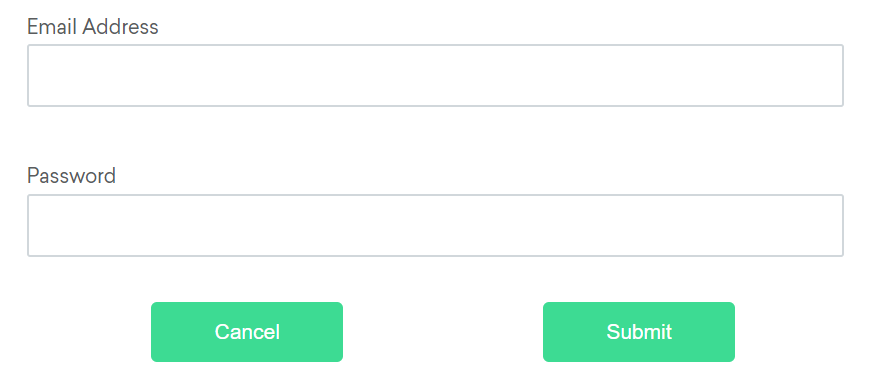

## *above* 方法

返回当前指定元素位置上方的 *WebElement* 对象

```python
# from selenium.webdriver.support.relative_locator import with_tag_name
passwordField = driver.find_element(By.ID, "password")
emailAddressField = driver.find_element(with_tag_name("input").above(passwordField))
```

## *below* 方法

返回当前指定元素位置下方的 *WebElement* 对象

```python
emailAddressField = driver.find_element(By.ID, "email")
passwordField = driver.find_element(with_tag_name("input").below(emailAddressField))
```

## *toLeftOf* 方法

返回当前指定元素位置左方的 *WebElement* 对象

```python
submitButton = driver.find_element(By.ID, "submit")
cancelButton = driver.find_element(with_tag_name("button").to_left_of(submitButton))
```

## *toRightOf* 方法

返回当前指定元素位置右方的 *WebElement* 对象

```python
cancelButton = driver.find_element(By.ID, "cancel")
submitButton = driver.find_element(with_tag_name("button").to_right_of(cancelButton))
```

## *near* 方法

返回当前指定元素位置附近大约 px50 的 *WebElement* 对象

```python
emailAddressLabel = driver.find_element(By.ID, "lbl-email")
emailAddressField = driver.find_element(with_tag_name("input").near(emailAddressLabel))
```

# *Frames and Iframes*

框架是一种现在已被弃用的方法，用于从同一域中的多个文档构建站点布局。除非你使用的是 *HTML5* 之前的 *webapp*，否则你不太可能与他们合作。内嵌框架允许插入来自完全不同领域的文档，并且仍然经常使用。

如果您需要使用框架或 *iframe*, *WebDriver* 允许以相同的方式使用它们。考虑 *iframe* 中的一个按钮。 如果我们使用浏览器开发工具检查元素，我们可能会看到以下内容:

```html
<div id="modal">
  <iframe id="buttonframe"name="myframe"src="https://seleniumhq.github.io">
   <button>Click here</button>
 </iframe>
</div>
```

如果不是 *iframe*，我们可能会使用如下方式点击按钮：

```python
# It won't work
driver.find_element(By.TAG_NAME, 'button').click()
```

但是，如果 *iframe* 之外没有按钮，那么您可能会得到一个 **no such element** 的错误。 这是因为 *Selenium* 只知道顶层文档中的元素。为了与按钮进行交互，我们需要首先切换到框架， 这与切换窗口的方式类似。*WebDriver* 提供了三种切换到帧的方法。

## 使用 *WebElement*

使用 *WebElement* 进行切换是最灵活的选择。您可以使用首选的选择器找到框架并切换到它。

```python
iframe = driver.find_element(By.CSS_SELECTOR, "#modal > iframe")

# switch to the selected iframe
driver.switch_to.frame(iframe)
driver.find_element(By.TAG_NAME, 'button').click()
```

## 使用 *name* 或 *id*

如果 *frame* 或 *iframe* 具有 *id* 或 *name* 属性，则可以使用该属性。如果名称或 *id* 在页面上不是唯一的， 那么将切换到找到的第一个。

```python
# switch iframe by id
driver.switch_to.frame('buttonframe')
driver.find_element(By.TAG_NAME, 'button').click()
```

## 使用索引

```python
# switch to the second iframe
driver.switch_to.frame(1)
```

## 离开框架

```python
# back to default content
driver.switch_to.default_content()
```

# 窗口管理

## 获取窗口大小

In [ ]:
# 分别获取每个尺寸
width = driver.get_window_size().get("width")
height = driver.get_window_size().get("height")

In [ ]:
# 或者存储尺寸并在以后查询它们
size = driver.get_window_size()
width1 = size.get("width")
height1 = size.get("height")

## 设置窗口大小

In [ ]:
driver.set_window_size(1024, 768)

## 得到窗口的位置

获取浏览器窗口左上角的坐标。

In [ ]:
# 分别获取每个尺寸
x = driver.get_window_position().get('x')
y = driver.get_window_position().get('y')

In [ ]:
# 或者存储尺寸并在以后查询它们
position = driver.get_window_position()
x1 = position.get('x')
y1 = position.get('y')

## 设置窗口位置

将窗口移动到设定的位置。

In [ ]:
# 将窗口移动到主显示器的左上角
driver.set_window_position(0, 0)

## 最大化窗口

In [ ]:
driver.maximize_window()

## 最小化窗口

In [ ]:
driver.minimize_window()

## 全屏窗口

填充整个屏幕，类似于在大多数浏览器中按下<kbd>F11</kbd>

In [ ]:
driver.fullscreen_window()

## 屏幕截图

In [ ]:
driver.save_screenshot('./image.png')

也可以用于捕获当前浏览上下文的元素的屏幕截图。返回以 *Base64* 格式编码的屏幕截图。

In [ ]:
driver.get('http://www.baidu.com')
div = driver.find_element(By.ID, "lg")
div.screenshot('./image.png')

## 打印页面

打印当前浏览器内的页面

注意: 此功能需要无头模式下的 *Chromium* 浏览器

```python
# from selenium.webdriver.common.print_page_options import PrintOptions
print_options = PrintOptions()
print_options.page_ranges = ['1-2']

driver.get("http://www.baidu.com")

base64code = driver.print_page(print_options)
```

# 执行脚本

对于某些操作，*Selenium API* 并没有提供。比如，下拉进度条。但是可以直接模拟运行 *JavaScript*，此时使用<code style="color: #ca7900">execute_script()</code>方法即可实现，

In [ ]:
driver.get('https://www.jd.com/')
driverdriver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
driver.execute_script('alert("123")')

# *JavaScript* 警告框，提示框和确认框

## *Alerts* 警告框

In [ ]:
driver.get('https://www.selenium.dev/documentation/zh-cn/webdriver/js_alerts_prompts_and_confirmations')

wait = WebDriverWait(driver, 10)

# Click the link to activate the alert
driver.find_element(By.LINK_TEXT, "查看样例警告框").click()

# Wait for the alert to be displayed and store it in a variable
alert = wait.until(EC.alert_is_present())

# Store the alert text in a variable
text = alert.text

# Press the OK button
alert.accept()

## *Confirm* 确认框

In [ ]:
driver.get('https://www.selenium.dev/documentation/zh-cn/webdriver/js_alerts_prompts_and_confirmations')

wait = WebDriverWait(driver, 10)

# Click the link to activate the alert
driver.find_element(By.LINK_TEXT, "查看样例确认框").click()

# Wait for the alert to be displayed
wait.until(EC.alert_is_present())

# Store the alert in a variable for reuse
alert = driver.switch_to.alert

# Store the alert text in a variable
text = alert.text

# Press the Cancel button
alert.dismiss()

## *Prompt* 提示框

提示框与确认框相似，不同之处在于它们还包括文本输入。与处理表单元素类似，可以使用 *WebDriver* 的 <code style="color: #ca7900">send_keys</code>来填写响应。这将完全替换占位符文本。按下取消按钮将不会提交任何文本。

In [ ]:
driver.get('https://www.selenium.dev/documentation/zh-cn/webdriver/js_alerts_prompts_and_confirmations')

wait = WebDriverWait(driver, 10)

# Click the link to activate the alert
driver.find_element(By.LINK_TEXT, "查看样例提示框").click()

# Wait for the alert to be displayed
wait.until(EC.alert_is_present())

# Store the alert in a variable for reuse
alert = Alert(driver)

# Type your message
alert.send_keys("Selenium")

# Press the OK button
alert.accept()

# *HTTP* 代理

```python
PROXY = "<HOST:PORT>"
webdriver.DesiredCapabilities.FIREFOX['proxy'] = {
    "httpProxy": PROXY,
    "ftpProxy": PROXY,
    "sslProxy": PROXY,
    "proxyType": "MANUAL",

}
```

# *Keyboard*

## *sendKeys*

<a href="https://www.w3.org/TR/webdriver/#keyboard-actions" style="text-decoration: none"><i>WebDriver</i> 能够支持的键位列表</a>

In [ ]:
driver.get("http://www.google.com")

# Enter "webdriver" text and perform "ENTER" keyboard action
driver.find_element(By.NAME, "q").send_keys("webdriver" + Keys.ENTER)bb

## *keyDown*

*keyDown* 用于模拟按下辅助按键（*CONTROL, SHIFT, ALT*）的动作。

In [ ]:
driver.get("http://www.google.com")

# Enter "webdriver" text and perform "ENTER" keyboard action
driver.find_element(By.NAME, "q").send_keys("webdriver" + Keys.ENTER)

# Perform action ctrl + A (modifier CONTROL + Alphabet A) to select the page
webdriver.ActionChains(driver).key_down(Keys.CONTROL).send_keys("a").perform()

## *keyUp*

*keyUp* 用于模拟辅助按键（*CONTROL, SHIFT, ALT*）弹起或释放的操作。

In [ ]:
driver.get("http://www.google.com")

# Store google search box WebElement
search = driver.find_element(By.NAME, "q")

action = webdriver.ActionChains(driver)

# Enters text "qwerty" with keyDown SHIFT key and after keyUp SHIFT key (QWERTYqwerty)
action.key_down(Keys.SHIFT).send_keys_to_element(search, "qwerty").key_up(Keys.SHIFT).send_keys("qwerty").perform()

## *clear*

清除可编辑元素的内容。这仅适用于可编辑且可交互的元素, 否则 *Selenium* 将返回错误（无效的元素状态或元素不可交互）。

In [ ]:
driver.get("http://www.google.com")

# Store 'SearchInput' element
SearchInput = driver.find_element(By.NAME, "q")
SearchInput.send_keys("selenium")

# Clears the entered text
SearchInput.clear()

# 无头浏览器

```python
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
```

# *selenium* 规避被检测识别

```python
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions

option = ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
driver = Chrome(options=option)
```